In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import pandas_profiling

In [3]:
DATA = '../../data/train/events_data.csv'
DESCRIPTION = '../../data/train/events_data_description.txt'

In [4]:
with open(DESCRIPTION, 'r') as file:
    print(*file)

game_id - идентификатор матча
 game_name - название матча
 file_name - имя файла трансляции
 event_type - тип игрового события
 event_time - время игрового события
 comments - комментарий (замены в перерыве, и события в компенсированное время)
 
 Важные замечания:
 1) Данные размечены людьми по ходу трансляции и могут иметь погрешность по времени.
 2) В некоторых матчах есть дополнительное время (два доп. тайма по 15 минут), а также серии послематчевых пенальти, но в рамках данного соревнования, для анализа и выдачи решения - предлагается только основное время (два тайма по 45 минут), а также компенсированное время, продлевающее основные таймы. События дополнительного времени и послематчевые пенальти из набора данных исключены.
 3) В случае если замена произошла в перерыве между таймами: время события указывается как 45:00. Аналогичная выдача ожидается в решении. Такие события помечены в файле соответствующим комментарием.
 4) В случае если событие произошло в компенсированное время: к

In [5]:
data = pd.read_csv(DATA)

In [6]:
def time_to_secs(time_str):
    m, s = map(int, time_str.split(':'))
    secs = m * 60 + s
    if secs < 0:
        print(time_str)
    return secs

data['event_time'] = data['event_time'].apply(time_to_secs)

In [7]:
data.columns

Index(['game_id', 'game_name', 'file_name', 'event_type', 'event_time',
       'comments'],
      dtype='object')

In [8]:
EVENT_TYPES = data['event_type'].unique()

In [9]:
pandas_profiling.ProfileReport(data)

Number of variables,6
Number of observations,949
Total Missing (%),16.1%
Total size in memory,44.6 KiB
Average record size in memory,48.1 B
Numeric,2
Categorical,4
Boolean,0
Date,0
Text (Unique),0
Rejected,0


### Замечания по данным
    -Коментарии довольно редкие (comments), особые события просиходят довольно редко
        -Компенсированное время первого тайм, замена в перерыве	- на эти события можно вообще забить
        -11 раз событие произошло в 45:00 (замена в перерыве) (можно забить)
    -Дизбаланс классов
        -Голы, желтые карточки редко (на первое время можно забить)
        -Удары по воротам часто
    -Событие чаще происходят к концу игры

In [18]:
def show_histogram_event_time(data, event_type, ax=None, bins=15):
    time = data[data['event_type'] == event_type]['event_time']
    sns.distplot(time, axlabel=event_type, bins=bins, ax=ax)

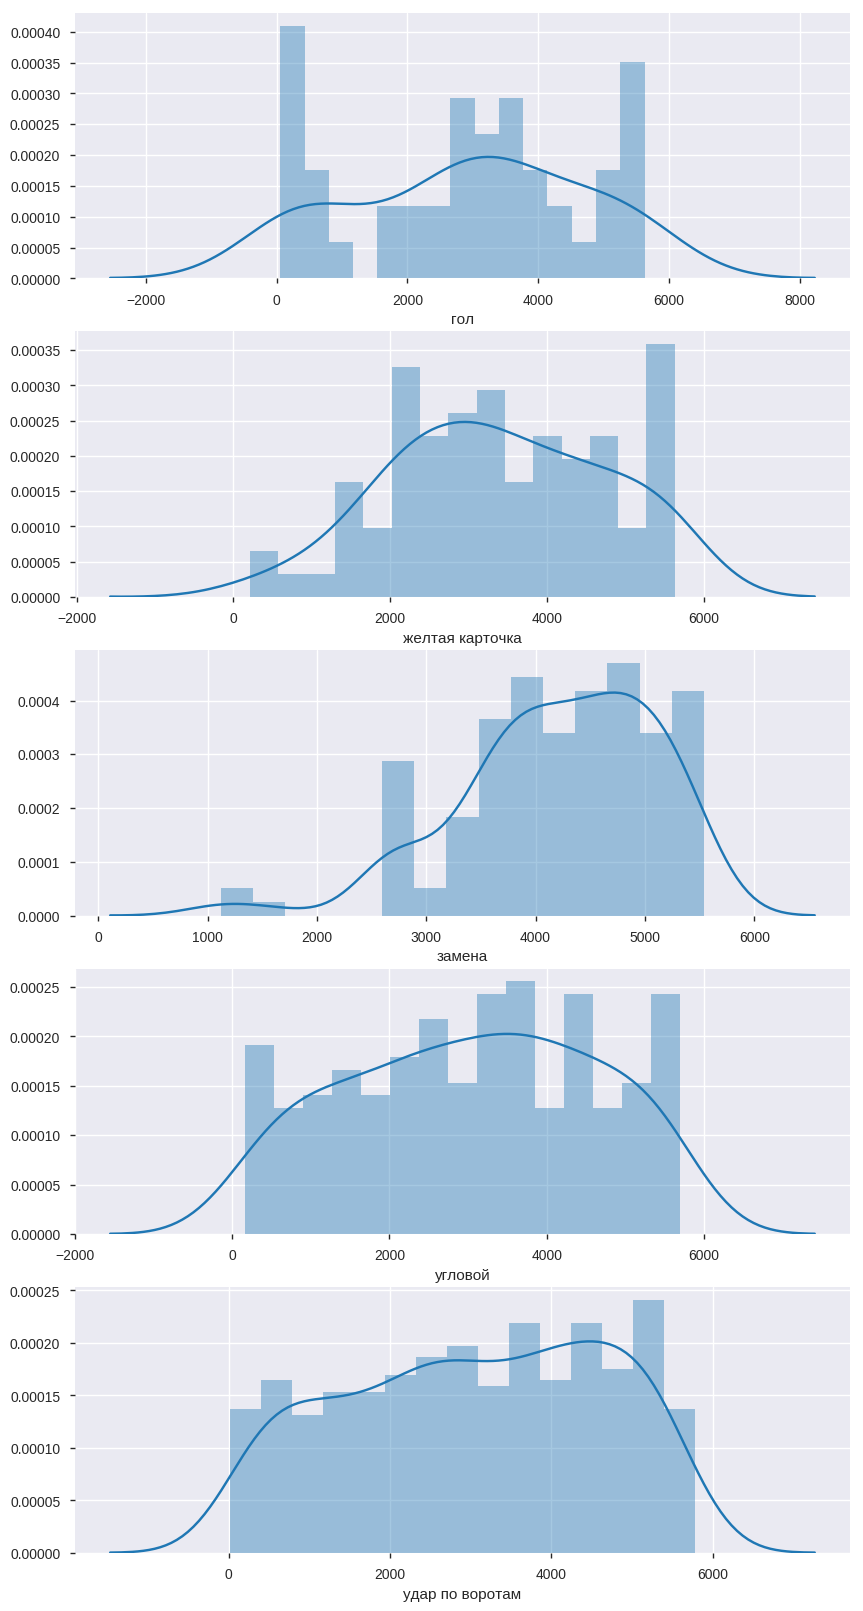

In [19]:
f, axs = plt.subplots(len(EVENT_TYPES), figsize=(10,20))
for event_type, ax in zip(EVENT_TYPES, axs):
    show_histogram_event_time(data, event_type, ax=ax)

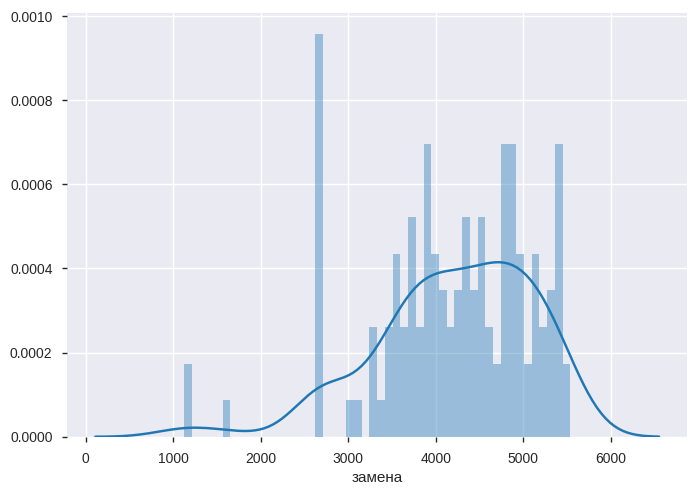

In [25]:
show_histogram_event_time(data, 'замена', bins=50)

In [41]:
most_common_replace_time = data[data['event_type'] == 'замена']['event_time'].mode()[0]
common_replace_count = data[(data['event_type'] == 'замена') & \
                            (data['event_time'] == most_comman_replace_time)].shape[0]
most_comman_replace_time, comman_replace_count

(2700, 11)

### Замечание
    -Часто замена происходит примерно в одно время (11 из 130)
        -Событие связано с перерывом
    -Большая часть замен происходит во второй половине игры

In [61]:
print(f"Среднее количество событий за игру: {data['game_id'].value_counts().mean()}")

Среднее количество событий за игру: 39.541666666666664


#### TODO:
    -Посчитать заполненность игры событиями